In [1]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

Starting path:/home/resisistancerow_909/image-to-tex-OCR/Jupyter_Notebooks
Current path:/home/resisistancerow_909/image-to-tex-OCR


In [2]:
# Import the Printed_Tex_Data_Module

from Data.Data_Module import Data_Module
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from IPython.display import display, Math

In [3]:
'''
path_to_formulas = 'Data/Data_Bank/formulas.lst',
                  path_to_image_names= 'Data/Data_Bank/images',


'''


data = Data_Module(stage = 'fit',
                 set_max_label_length = 128,
                 number_png_images_to_use_in_dataset=300*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.99,
                vocabulary_path = 'Data/Data_Bank/230k.json',
                
                load_vocabulary = True,
                   image_padding = True,
                   max_width = 700,
                 


                batch_size = 64,
                num_workers = 8,
                data_on_gpu = False,
                )



# Generates the dataframe from the images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt
data.prepare_data()

# if one wants to load a vocabulary do not use data.prepare_dataframe(), 
# but instead set load_vocabulary = True


In [4]:
data.df

formula  \
0       R _ { 1 2 } K _ { 1 } R _ { 2 1 } d K _ { 2 } ...   
1       E _ { n } - E _ { m } = \frac { \lambda ^ { \p...   
2       \sigma ^ { 1 } + i \sigma ^ { 2 } = f ( \sigma...   
3       B | _ { \partial \Sigma _ { 3 } } \rightarrow ...   
4       \phi _ { i } ^ { \prime } ( x ) = \phi _ { i }...   
...                                                   ...   
238324  < \tilde { \phi } _ { \omega } , \phi _ { \ome...   
238325  S = { \frac { 1 } { 8 \pi } } \int d x d y \le...   
238326  A _ { \mu i j } ^ { a } = < \psi _ { j } ^ { a...   
238327  B _ { I } ( f , g ) = B _ { J } ( f , g ) , \q...   
238328  ( D \Psi ^ { + } ) _ { e f f } = - { \frac { \...   

                 image_name  height  width  formula_length  \
0       80f1db54ec657ab.png      20    200             105   
1       4c0c01a5fb03248.png      39    169             106   
2       3f55826fd850d77.png      19    138              75   
3       a6a043f87f6ffdc.png      20    142             123   
4       4d0e536147c711b.png      18    175             118   
...                     ...     ...    ...             ...   
238324  f39eae8d337aa45.png      34    415             310   
238325  4300c834ccf1441.png      37    354             231   
238326  e905b0f81c6129c.png      35    128             126   
238327  86ff16d9846059b.png      17    185              62   
238328  48313fc05eeab78.png      38    295             203   

                                          latex_tokenized  tokenized_len  
0       [R, _, {, 1, 2, }, K, _, {, 1, }, R, _, {, 2, ...             53  
1       [E, _, {, n, }, -, E, _, {, m, }, =, \frac, {,...             46  
2       [\sigma, ^, {, 1, }, +, i, \sigma, ^, {, 2, },...             28  
3       [B, |, _, {, \partial, \Sigma, _, {, 3, }, }, ...             36  
4       [\phi, _, {, i, }, ^, {, \prime, }, (, x, ), =...             43  
...                                                   ...            ...  
238324  [<, \tilde, {, \phi, }, _, {, \omega, }, ,, \p...            104  
238325  [S, =, {, \frac, {, 1, }, {, 8, \pi, }, }, \in...             80  
238326  [A, _, {, \mu, i, j, }, ^, {, a, }, =, <, \psi...             49  
238327  [B, _, {, I, }, (, f, ,, g, ), =, B, _, {, J, ...             26  
238328  [(, D, \Psi, ^, {, +, }, ), _, {, e, f, f, }, ...             85  

[223259 rows x 7 columns]

In [5]:
print( 
    'Vocabulary size:',len(data.vocabulary),
    '\nMax label length:', data.max_label_length,
    "\nStart <S> goes to index ",data.vocabulary['<S>'],
      "\nEnd <E> goes to index ",data.vocabulary['<E>'],
      "\nPadding <P> goes to index ",data.vocabulary['<P>'],
)

Vocabulary size: 579 
Max label length: 130 
Start <S> goes to index  0 
End <E> goes to index  1 
Padding <P> goes to index  2


In [6]:
# prepeares the dataloaders with transformations and splits train/val
data.setup()

Train/Val Data is ready for Model loading.


In [7]:
data.inverse_vocabulary

{0: '<S>',
 1: '<E>',
 2: '<P>',
 3: '!',
 4: '"',
 5: '&',
 6: '(',
 7: ')',
 8: '*',
 9: '+',
 10: ',',
 11: '-',
 12: '--',
 13: '---',
 14: '.',
 15: '/',
 16: '0',
 17: '0.14',
 18: '0.4',
 19: '0.5',
 20: '0.7',
 21: '1',
 22: '1.5',
 23: '10',
 24: '2',
 25: '3',
 26: '4',
 27: '5',
 28: '6',
 29: '7',
 30: '8',
 31: '8.5',
 32: '9',
 33: ':',
 34: ';',
 35: '<',
 36: '=',
 37: '>',
 38: '?',
 39: '@',
 40: 'A',
 41: 'B',
 42: 'C',
 43: 'D',
 44: 'E',
 45: 'F',
 46: 'G',
 47: 'H',
 48: 'I',
 49: 'J',
 50: 'K',
 51: 'L',
 52: 'M',
 53: 'N',
 54: 'O',
 55: 'P',
 56: 'Q',
 57: 'R',
 58: 'S',
 59: 'T',
 60: 'U',
 61: 'V',
 62: 'W',
 63: 'X',
 64: 'Y',
 65: 'Z',
 66: '[',
 67: '\\',
 68: '\\!',
 69: '\\#',
 70: '\\&',
 71: '\\,',
 72: '\\:',
 73: '\\;',
 74: '\\Big',
 75: '\\Bigg',
 76: '\\Biggl',
 77: '\\Biggm',
 78: '\\Biggr',
 79: '\\Bigl',
 80: '\\Bigm',
 81: '\\Bigr',
 82: '\\Box',
 83: '\\Gamma',
 84: '\\Huge',
 85: '\\Im',
 86: '\\Join',
 87: '\\LARGE',
 88: '\\Lambda',
 89: '

# Checking the data 


In [8]:
data.df['image_name'][10]

'0110f3766ade0e1.png'

Image is below


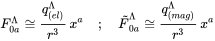

Label:


<IPython.core.display.Math object>

Tex formula: 

F _ { 0 a } ^ { \Lambda } \cong \frac { q _ { ( e l ) } ^ { \Lambda } } { r ^ { 3 } } \, x ^ { a } \quad ; \quad { \tilde { F } } _ { 0 a } ^ { \Lambda } \cong \frac { q _ { ( m a g ) } ^ { \Lambda } } { r ^ { 3 } } \, x ^ { a }


In [9]:
# How to access generated png images 
IMAGE_NAME = data.df['image_name'][10]
image_path= "Data/Data_Bank/generated_png_images/" + IMAGE_NAME
image = Image.open(image_path)#.convert("L")
print('Image is below')
display(image)

# Related Label

image_label_list = data.df[data.df['image_name'] ==  IMAGE_NAME]['formula'].tolist()#.item()
image_label = " ".join(image_label_list)
print('Label:')
display(Math(image_label))
print('Tex formula: \n')
print(data.df[data.df['image_name'] == IMAGE_NAME]['formula'].item())

In [10]:
import torch
from torch.utils.data import ConcatDataset, DataLoader
import tqdm
mean = 0.
std = 0.
num_samples = 0
dataloader = DataLoader(data.data_train, batch_size=128)
i=0
for d, _ in tqdm.tqdm(iter(dataloader)):
    print(d.shape)
    batch_size = d.shape[0]
    d = d.view(batch_size, d.shape[1], -1)
    print(d.shape)
    mean += d.float().mean(2).sum(0)
    std += d.float().std(2).sum(0)
    num_samples += batch_size
    i +=1
    if i>1:
        break

mean /= num_samples
std /= num_samples


print('Mean: ', mean)
print('Std: ', std)

  0%|                                                                         | 1/1727 [00:01<52:17,  1.82s/it]

torch.Size([128, 1, 128, 1920])
torch.Size([128, 1, 245760])


  0%|                                                                       | 1/1727 [00:03<1:41:02,  3.51s/it]

torch.Size([128, 1, 128, 1920])
torch.Size([128, 1, 245760])
Mean:  tensor([-2.0337])
Std:  tensor([2.3244])


### Check  vocabulary 

In [11]:
print(data.vocabulary)

{'<S>': 0, '<E>': 1, '<P>': 2, '!': 3, '"': 4, '&': 5, '(': 6, ')': 7, '*': 8, '+': 9, ',': 10, '-': 11, '--': 12, '---': 13, '.': 14, '/': 15, '0': 16, '0.14': 17, '0.4': 18, '0.5': 19, '0.7': 20, '1': 21, '1.5': 22, '10': 23, '2': 24, '3': 25, '4': 26, '5': 27, '6': 28, '7': 29, '8': 30, '8.5': 31, '9': 32, ':': 33, ';': 34, '<': 35, '=': 36, '>': 37, '?': 38, '@': 39, 'A': 40, 'B': 41, 'C': 42, 'D': 43, 'E': 44, 'F': 45, 'G': 46, 'H': 47, 'I': 48, 'J': 49, 'K': 50, 'L': 51, 'M': 52, 'N': 53, 'O': 54, 'P': 55, 'Q': 56, 'R': 57, 'S': 58, 'T': 59, 'U': 60, 'V': 61, 'W': 62, 'X': 63, 'Y': 64, 'Z': 65, '[': 66, '\\': 67, '\\!': 68, '\\#': 69, '\\&': 70, '\\,': 71, '\\:': 72, '\\;': 73, '\\Big': 74, '\\Bigg': 75, '\\Biggl': 76, '\\Biggm': 77, '\\Biggr': 78, '\\Bigl': 79, '\\Bigm': 80, '\\Bigr': 81, '\\Box': 82, '\\Gamma': 83, '\\Huge': 84, '\\Im': 85, '\\Join': 86, '\\LARGE': 87, '\\Lambda': 88, '\\Large': 89, '\\Leftarrow': 90, '\\Leftrightarrow': 91, '\\Longleftarrow': 92, '\\Longleftri

In [12]:
# Can acrtually see the frequncies

data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

token   id     freq
575       {  575  2578717
577       }  577  2578717
543       _  543   852123
542       ^  542   720561
24        2   24   432506
..      ...  ...      ...
503  \unlhd  503        1
177     \cl  177        1
1       <E>    1        0
2       <P>    2        0
0       <S>    0        0

[579 rows x 3 columns]

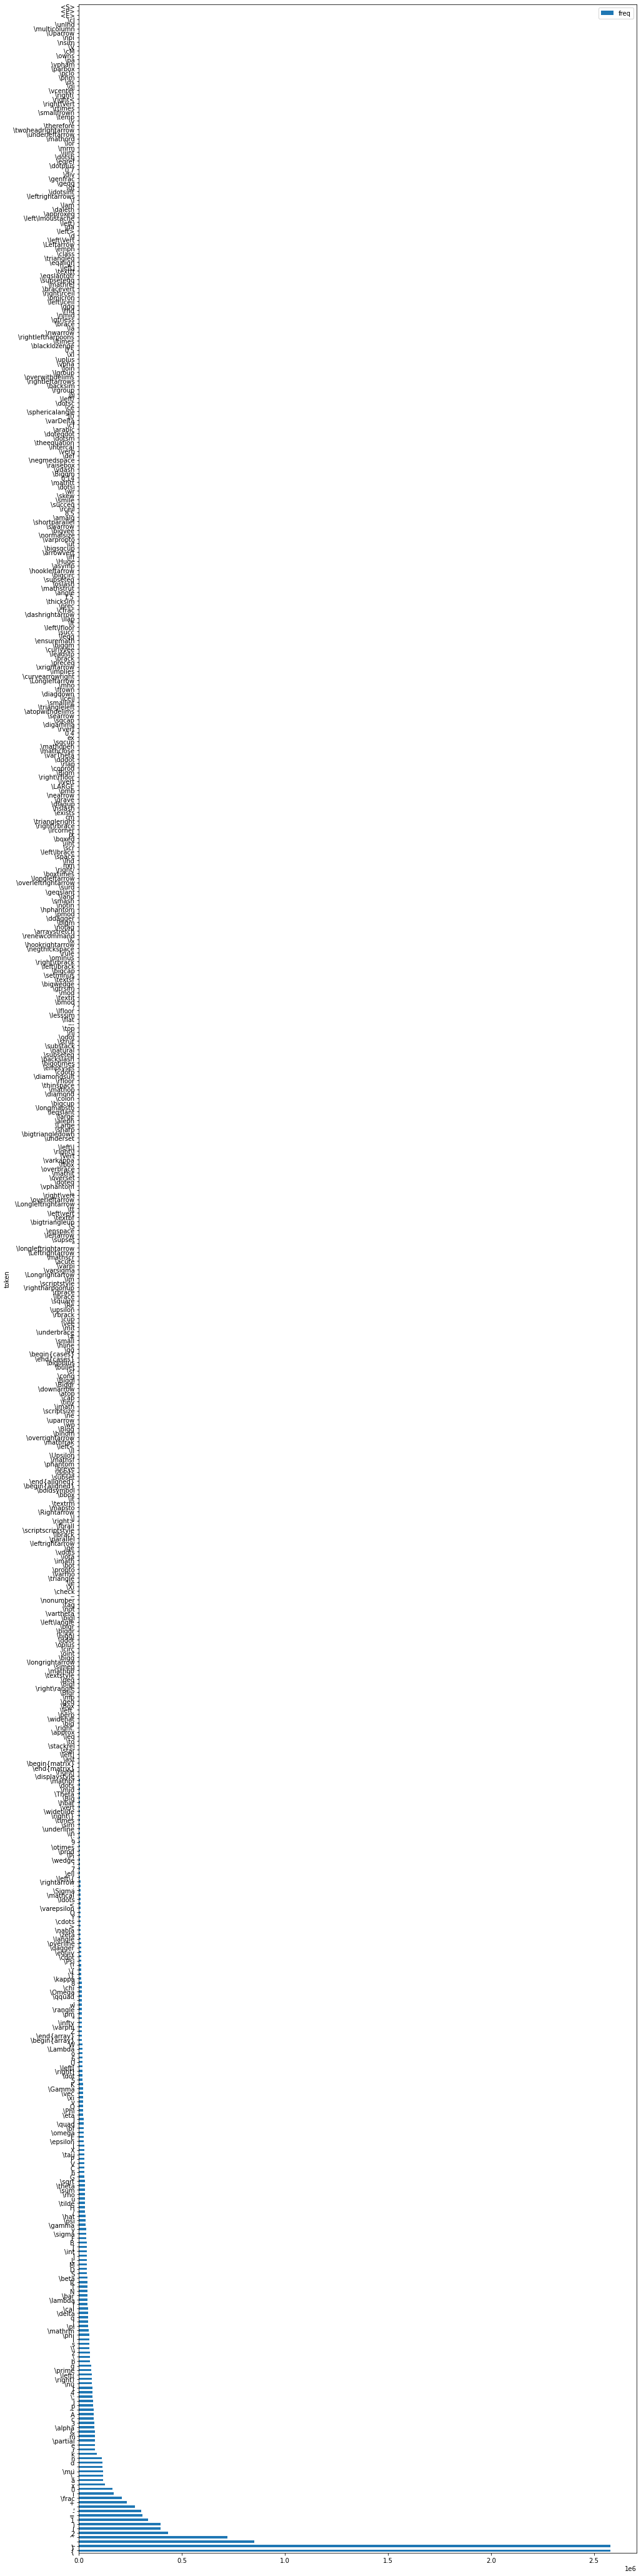

In [13]:
# Plot of vocabulary
import matplotlib.pyplot as plt

# first order the columns by decsending frequncy 
data.data_server.vocabulary_dataframe = data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

# next we plot them
data.data_server.vocabulary_dataframe.plot(x="token", y='freq', kind='barh', figsize =(16,75))
plt.show()

#### Look at the distribution of data

In [14]:
# We plot the tokenized len distribution

tokenized_len = data.df['tokenized_len'].value_counts()
tokenized_len

37    3924
35    3914
36    3883
39    3868
41    3831
      ... 
10      97
9       70
8       32
7       31
6        5
Name: tokenized_len, Length: 122, dtype: int64

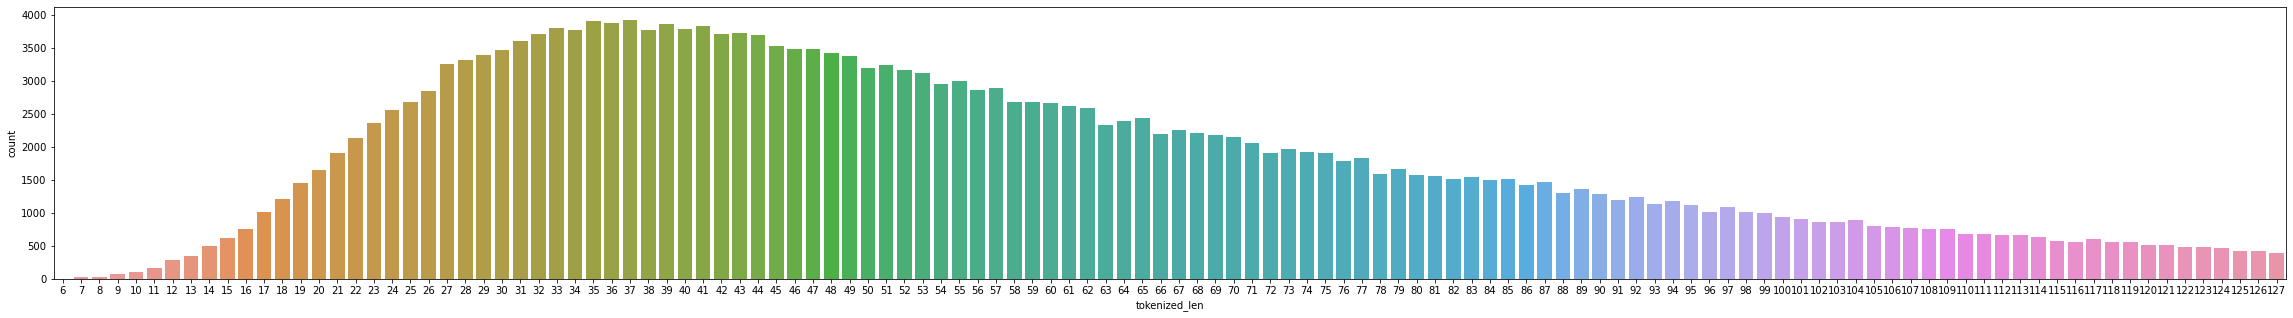

In [15]:
# How long are formulas
plt.figure(figsize=(40,5))
sns.countplot(x=data.df['tokenized_len']);

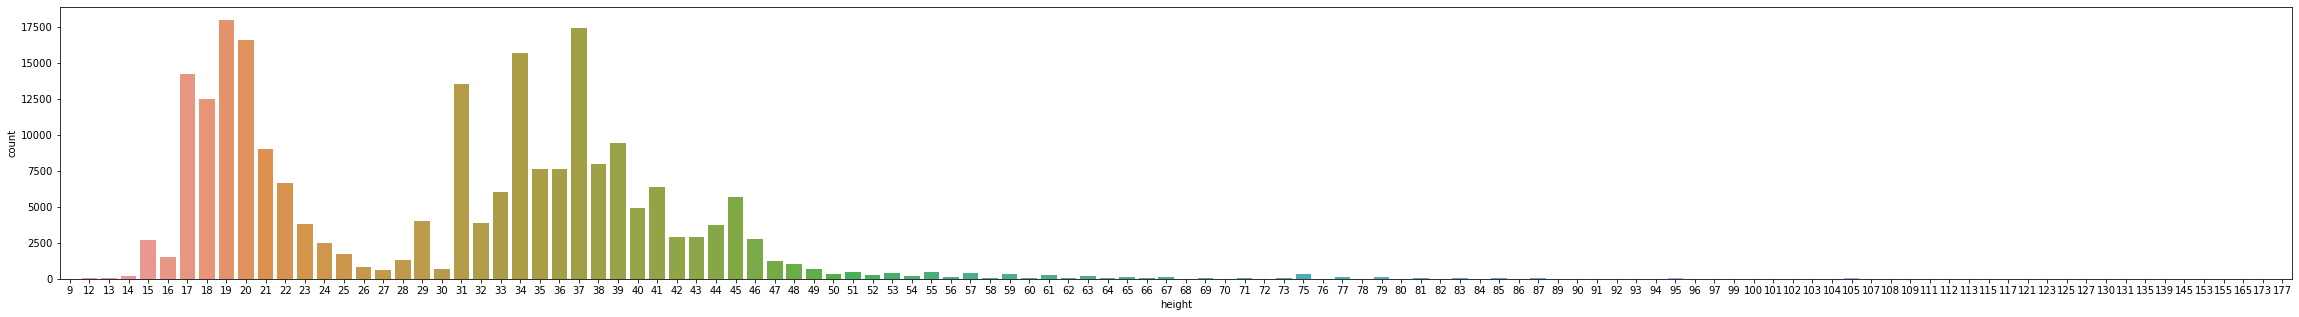

In [16]:
# Images heights PLOT
plt.figure(figsize=(40,5))
sns.countplot(x = data.df['height'])
plt.show()

In [17]:
data.df['height'].mean()

30.358708943424453

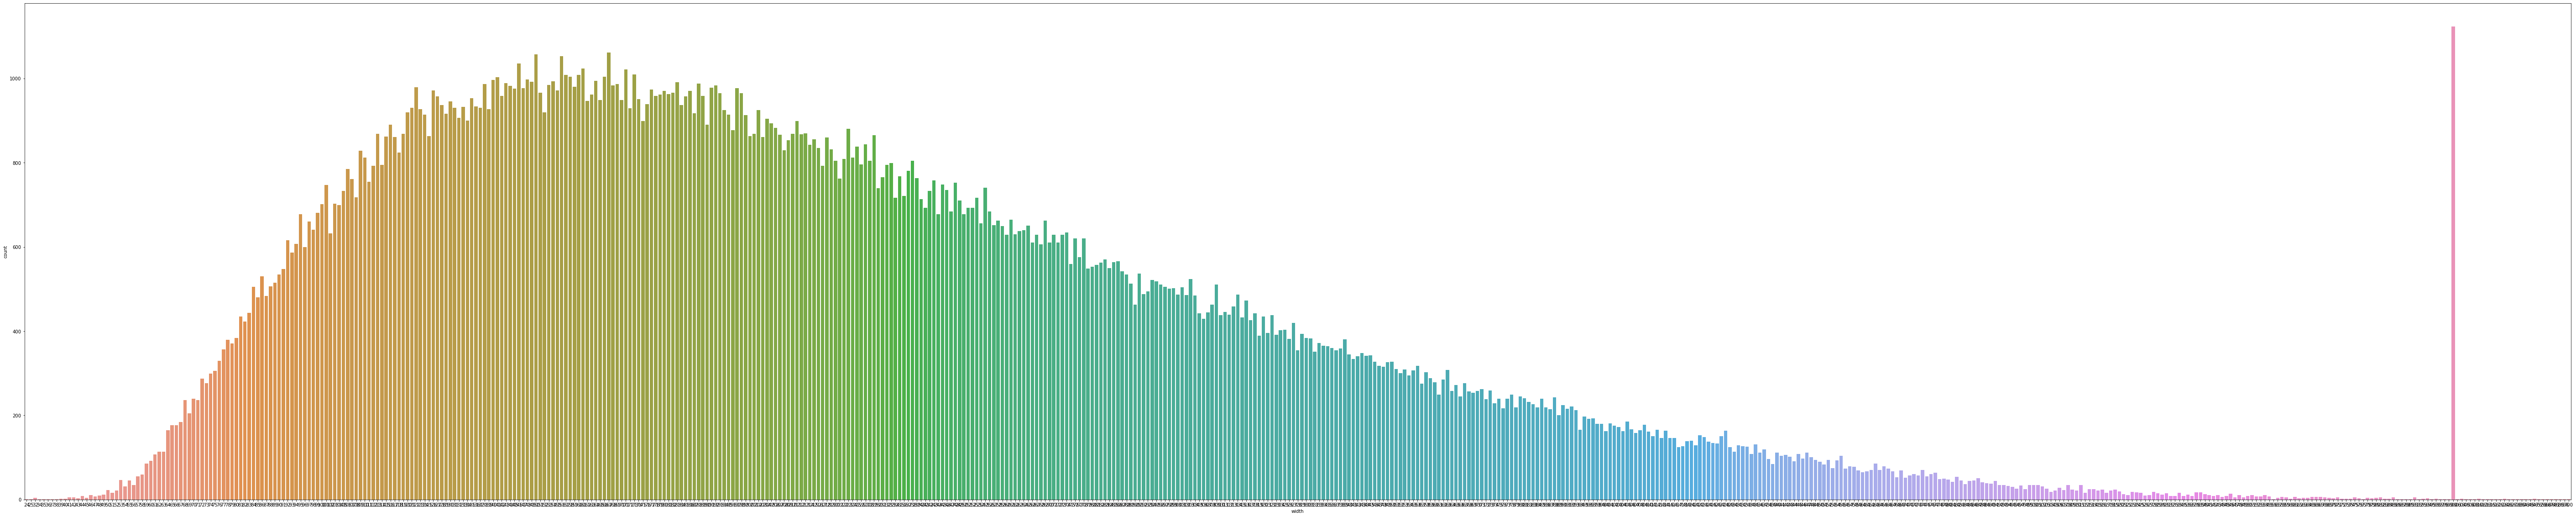

In [18]:
# Images wodth PLOT
plt.figure(figsize=(100,20))
sns.countplot(x = data.df['width'][(data.df['width']>0) & (data.df['width']<2000) ])
plt.show()


In [19]:
data.df['width'].mean()

219.89832436766267

## Acessing the data

In [20]:
# Helper Function to convert prediction labels to strings
def token_to_strings(tokens):
    mapping = data.vocabulary
    inverse_mapping =data.inverse_vocabulary
    s=''
    if tokens.shape[0] ==1:
        tokens = tokens[0]
    for number in tokens:
        letter = inverse_mapping[number.item()]
        s= s + str(letter)
    return s


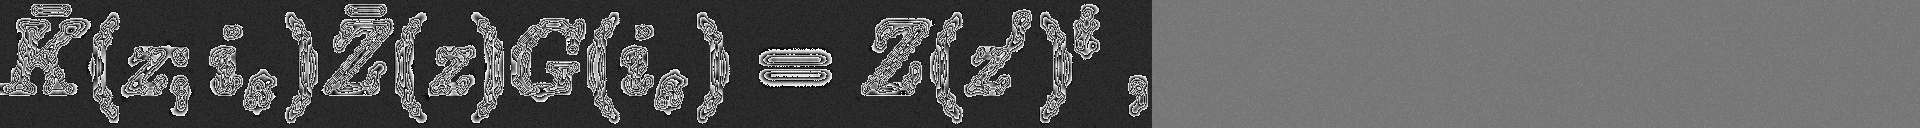

<S>h^{1}(dP_{9},{\calO}_{dP_{9}}(6\sigma|_{dP_{9}}-F))|_{c_{-3}}=2.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>


In [21]:
transform = transforms.ToPILImage()
display(transform(data.data_train[10000][0]))
print(token_to_strings(data.data_train[1][1]))

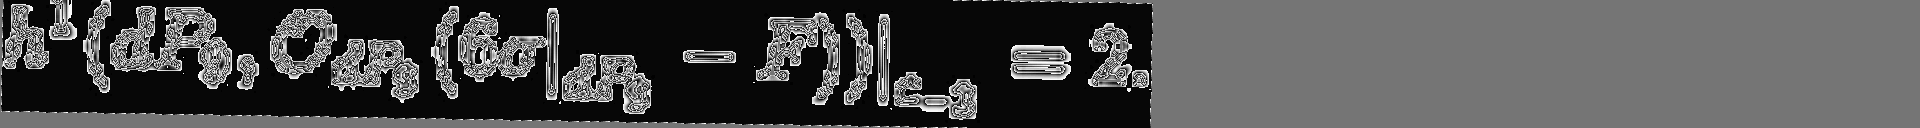

In [22]:
display(transform(data.data_train[1][0]))

torch.Size([1, 128, 1920])

Original image and formula:


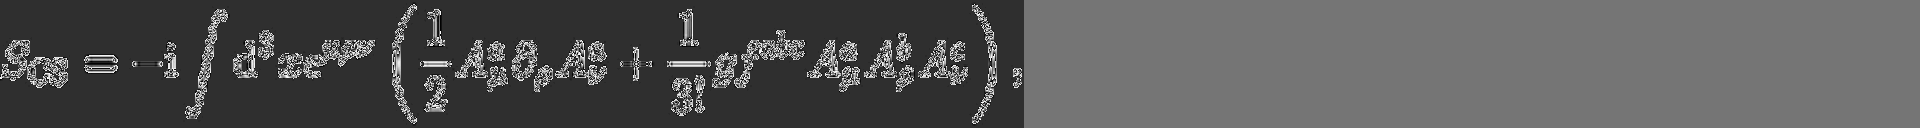

<S>S_{\mathrm{CS}}=-\mathrm{i}\int\mathrm{d}^{3}x\epsilon^{\mu\rho\nu}\left(\frac{1}{2}A_{\mu}^{a}\partial_{\rho}A_{\nu}^{a}+\frac{1}{3!}gf^{abc}A_{\mu}^{a}A_{\rho}^{b}A_{\nu}^{c}\right),<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


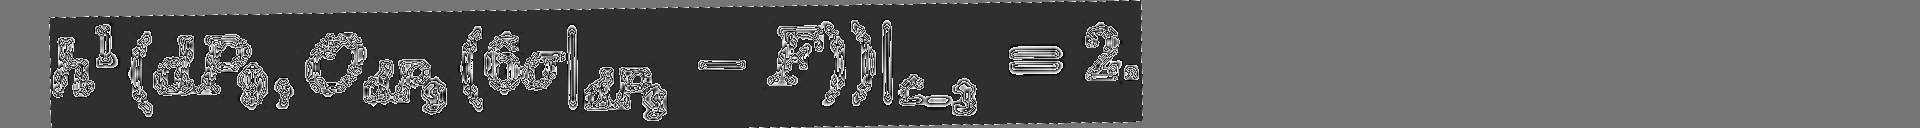

<S>h^{1}(dP_{9},{\calO}_{dP_{9}}(6\sigma|_{dP_{9}}-F))|_{c_{-3}}=2.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


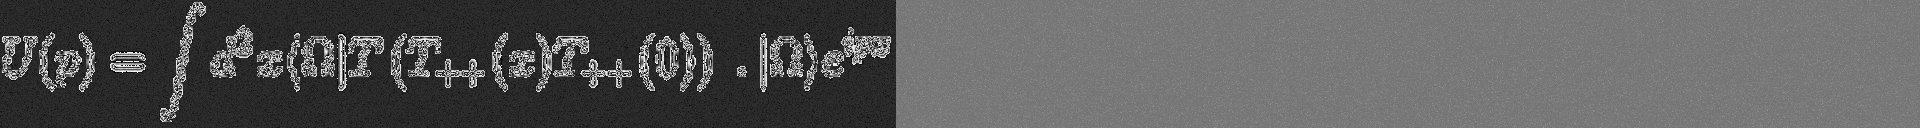

<S>U(p)=\intd^{2}x\langle\Omega|T\left(T_{++}(x)T_{++}(0)\right)\;.|\Omega\ranglee^{ipx}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


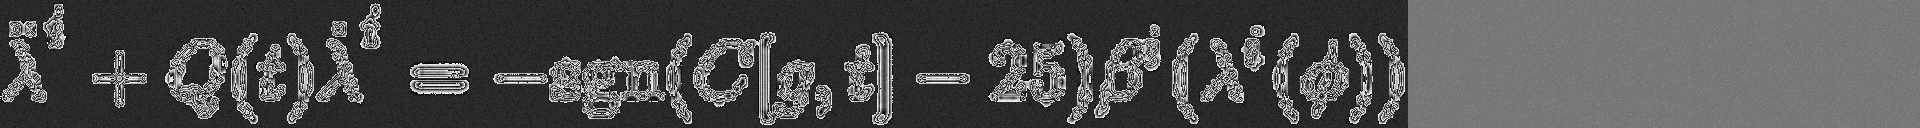

<S>{\ddot{\lambda}}^{i}+Q(t){\dot{\lambda}}^{i}=-\mathrm{sgn}(C[g,t]-25)\beta^{i}(\lambda^{i}(\phi))<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


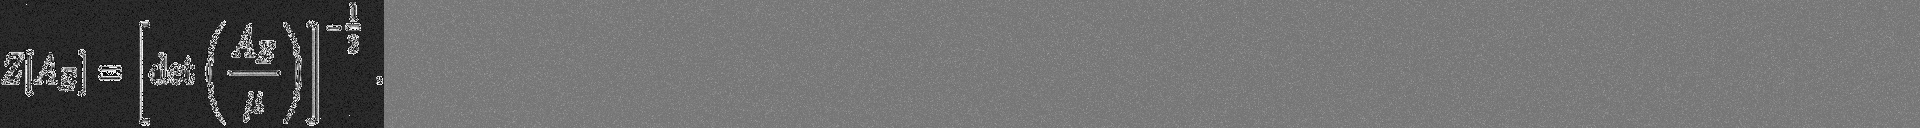

<S>Z[A_{E}]=\left[\mathrm{det}\left(\frac{A_{E}}{\mu}\right)\right]^{-\frac{1}{2}}\:.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


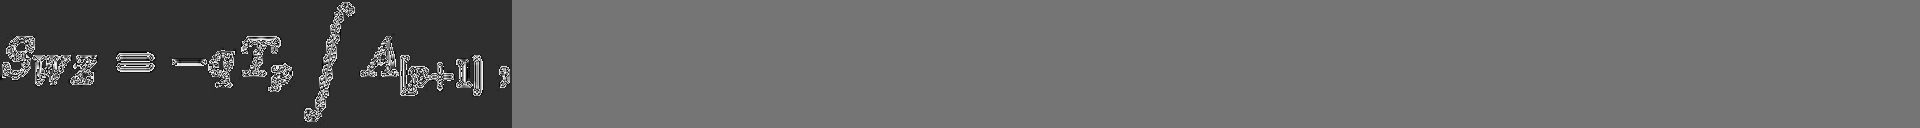

<S>S_{WZ}=-q\,T_{p}\intA_{[p+1]}\,,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


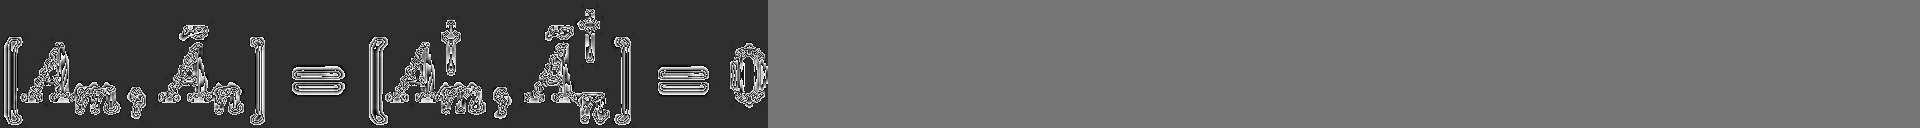

<S>[A_{m},\tilde{A}_{n}]=[A_{m}^{\dagger},\tilde{A}_{n}^{\dagger}]=0<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


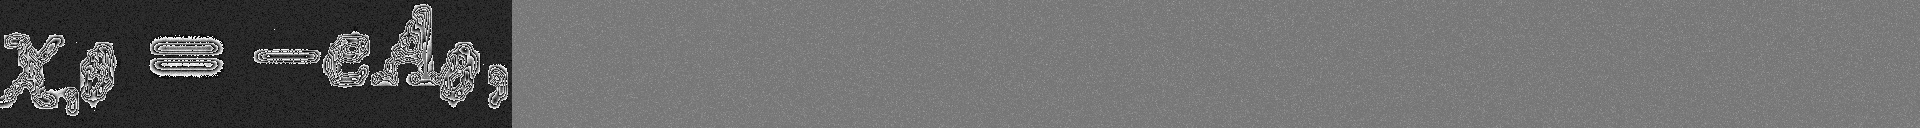

<S>\chi_{,\theta}=-eA_{\theta},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


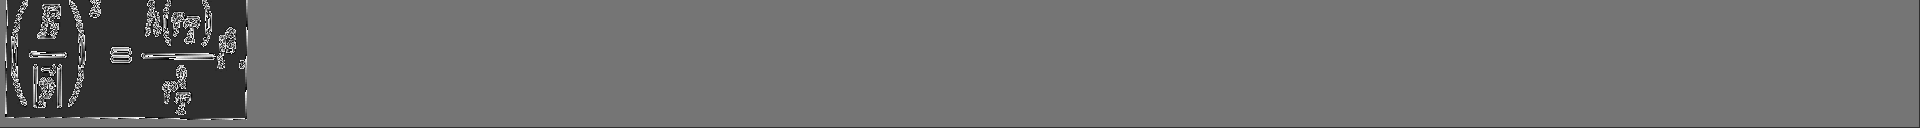

<S>\left(\frac{E}{|\vec{p}|}\right)^{2}=\frac{h(r_{T})}{r_{T}^{2}}l^{2}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


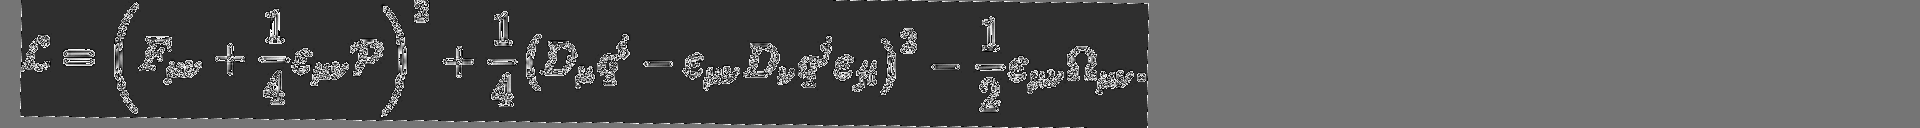

<S>{\calL}=\left(F_{\mu\nu}+{\frac{1}{4}}\varepsilon_{\mu\nu}{\calP}\right)^{2}+{\frac{1}{4}}\left(D_{\mu}q^{i}-\varepsilon_{\mu\nu}D_{\nu}q^{j}\varepsilon_{ji}\right)^{2}-{\frac{1}{2}}\varepsilon_{\mu\nu}\Omega_{\mu\nu}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


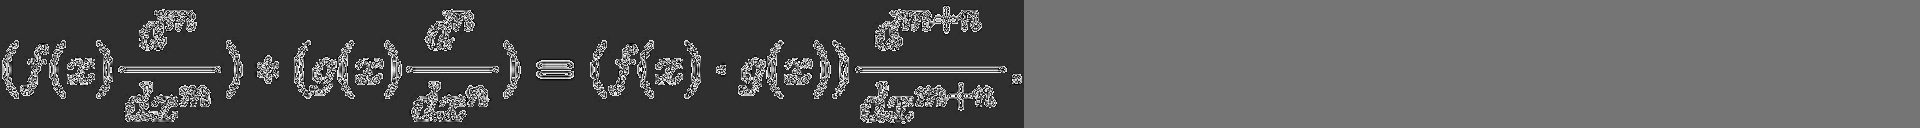

<S>(f(x)\frac{d^{m}}{dx^{m}})*(g(x)\frac{d^{n}}{dx^{n}})=(f(x)\cdotg(x))\frac{d^{m+n}}{dx^{m+n}}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


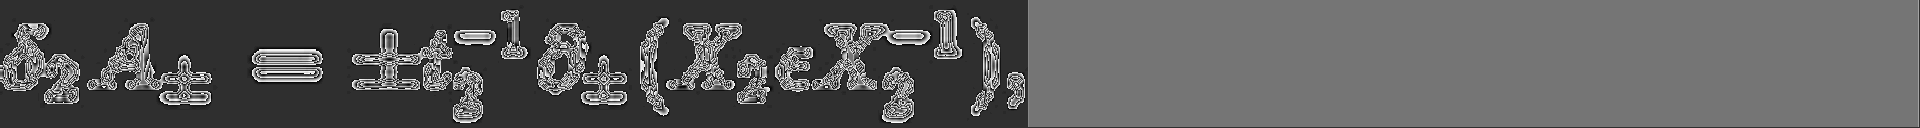

<S>\delta_{2}A_{\pm}=\pmt_{2}^{-1}\partial_{\pm}(X_{2}\epsilonX_{2}^{-1}),<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


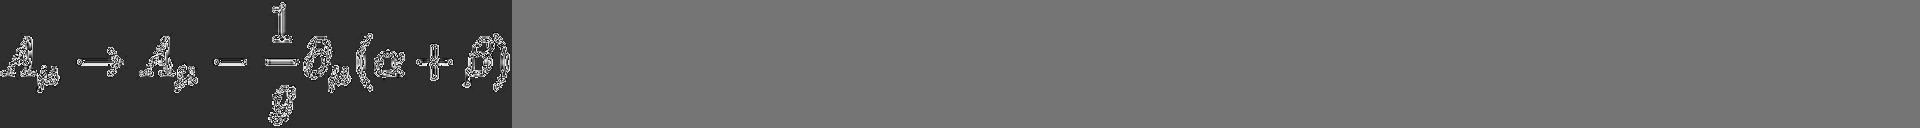

<S>A_{\mu}\toA_{\mu}-\frac{1}{g}\partial_{\mu}(\alpha+\beta)<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


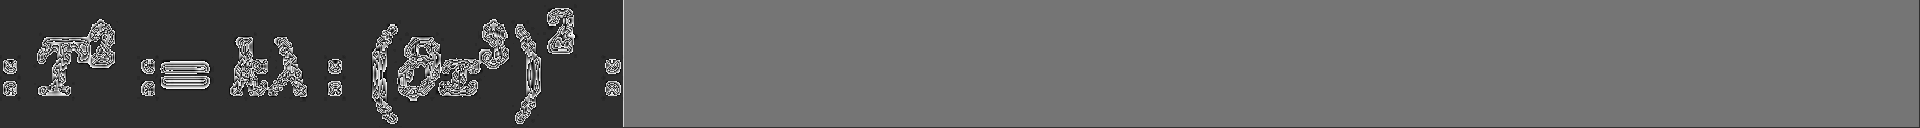

<S>:T^{2}:=k\lambda:\left(\partialx^{3}\right)^{2}:<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


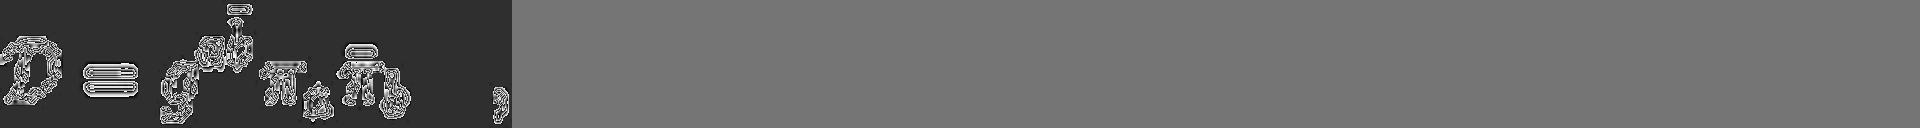

<S>{\calD}=g^{a\bar{b}}\pi_{a}{\bar{\pi}}_{b}\quad,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


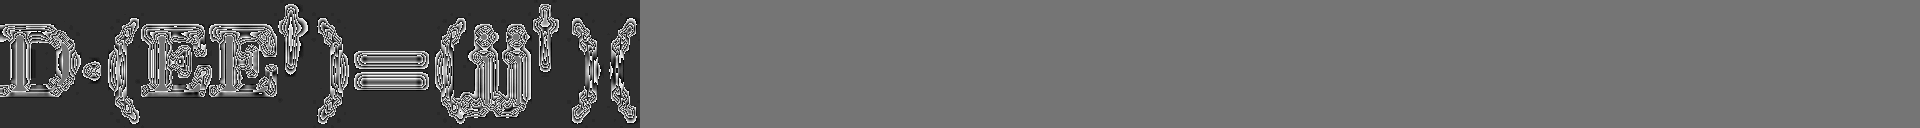

<S>{\bfD\cdot}({\bfEE}^{{\bf\dagger}}){\bf=}({\bfjj}^{{\bf\dagger}})(<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


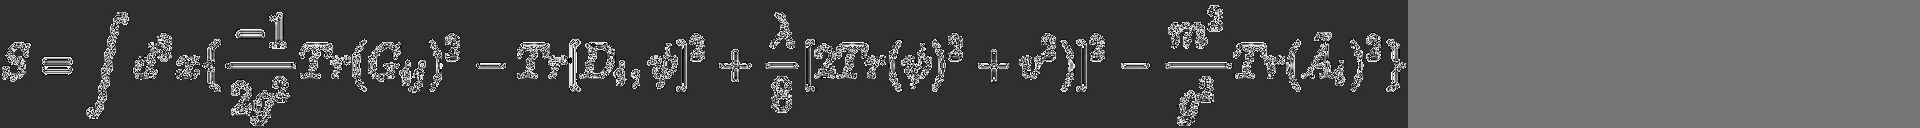

<S>S=\intd^{3}x\{\frac{-1}{2g^{2}}Tr(G_{ij})^{2}-Tr[D_{i},\psi]^{2}+\frac{\lambda}{8}[2Tr(\psi)^{2}+v^{2})]^{2}-\frac{m^{2}}{g^{2}}Tr(\tilde{A}_{i})^{2}\}<E><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


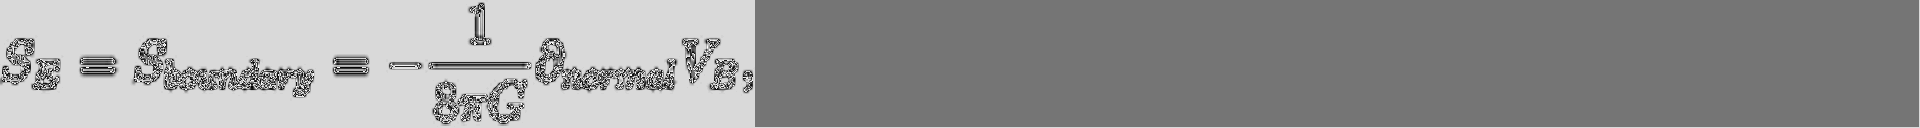

<S>S_{E}=S_{boundary}=-\frac{1}{8\piG}\partial_{normal}V_{B},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


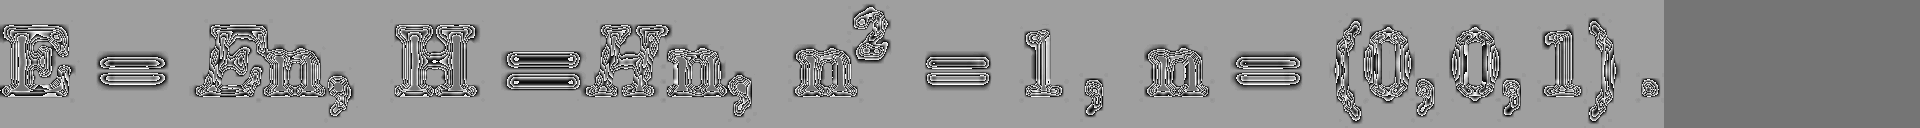

<S>{\bfE}=E{\bfn,\;H=}H{\bfn,\;n}^{2}=1\,,\;{\bfn}=(0,0,1)\,.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


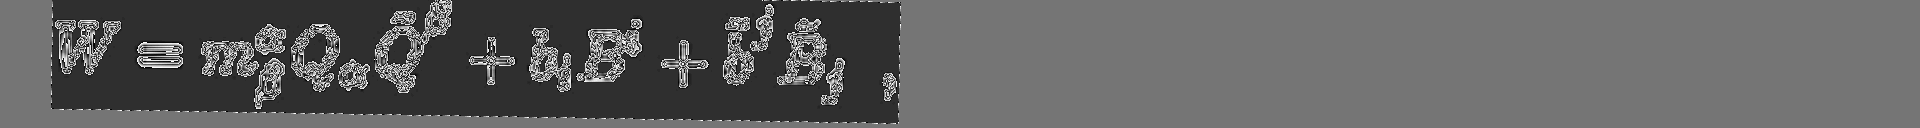

<S>W=m_{\beta}^{\alpha}Q_{\alpha}\tilde{Q}^{{\beta}}+b_{i}B^{i}+\tilde{b}^{{j}}\tilde{B}_{{j}}~~,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


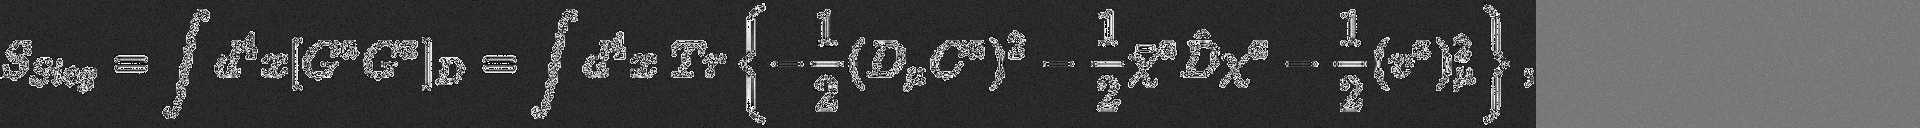

<S>S_{Sieg}=\intd^{4}x[G^{a}G^{a}]_{D}=\intd^{4}x\;Tr\left\{-\frac{1}{2}(D_{\mu}C^{a})^{2}-\frac{1}{2}\bar{\chi}{}^{a}\hat{D}\chi^{a}-\frac{1}{2}(v^{a})_{\mu}^{2}\right\},<E><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


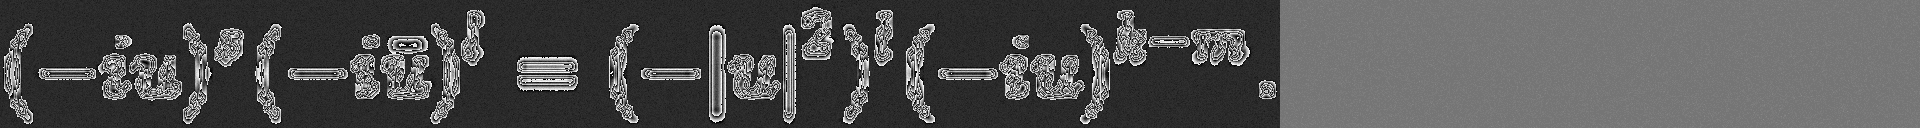

<S>(-iu)^{s}(-i\bar{u})^{l}=(-|u|^{2})^{l}(-iu)^{k-m}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


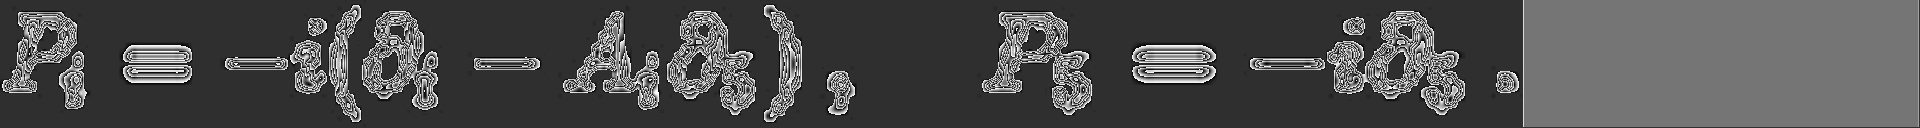

<S>P_{i}=-i(\partial_{i}-A_{i}\partial_{5})\,,\quadP_{5}=-i\partial_{5}\,.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


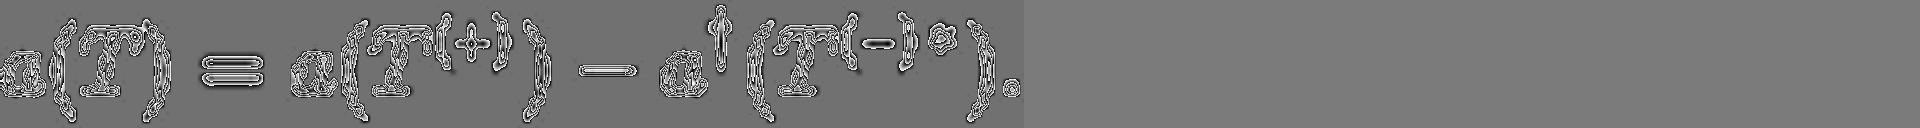

<S>a(T)=a(T^{\scriptscriptstyle(+)})-a^{\dagger}(T^{\scriptscriptstyle(-)}{}^{*}).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


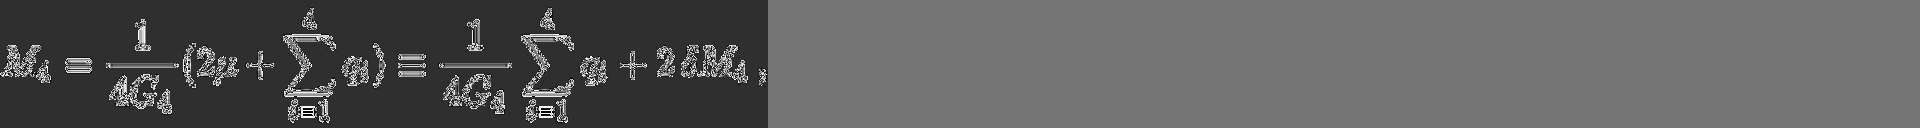

<S>M_{4}=\frac{1}{4G_{4}}(2\mu+\sum_{i=1}^{4}q_{i})\equiv\frac{1}{4G_{4}}\sum_{i=1}^{4}q_{i}+2\,\deltaM_{4}\,,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


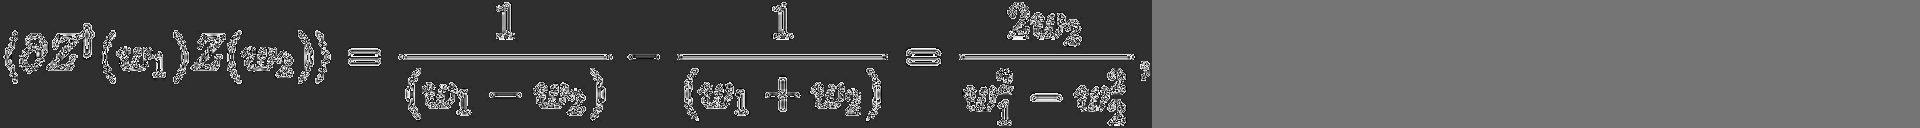

<S>\langle\partialZ^{\dagger}(w_{1})Z(w_{2})\rangle=\frac{1}{(w_{1}-w_{2})}-\frac{1}{(w_{1}+w_{2})}=\frac{2w_{2}}{w_{1}^{2}-w_{2}^{2}},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


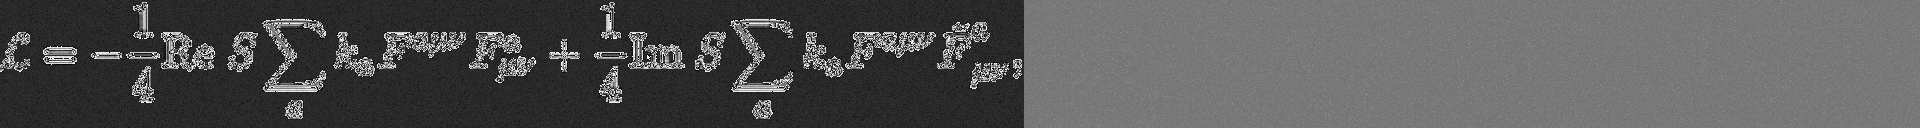

<S>{\calL}=-{\frac{1}{4}}\mathrm{Re}\;S\sum_{a}k_{a}F^{a\mu\nu}F_{\mu\nu}^{a}+{\frac{1}{4}}\mathrm{Im}\;S\sum_{a}k_{a}F^{a\mu\nu}\tilde{F}_{\mu\nu}^{a},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


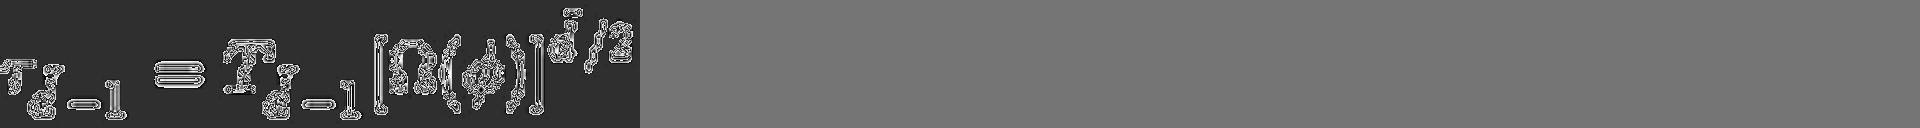

<S>\tau_{\tilde{d}-1}=T_{\tilde{d}-1}\left[\Omega(\phi)\right]^{\tilde{d}/2}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


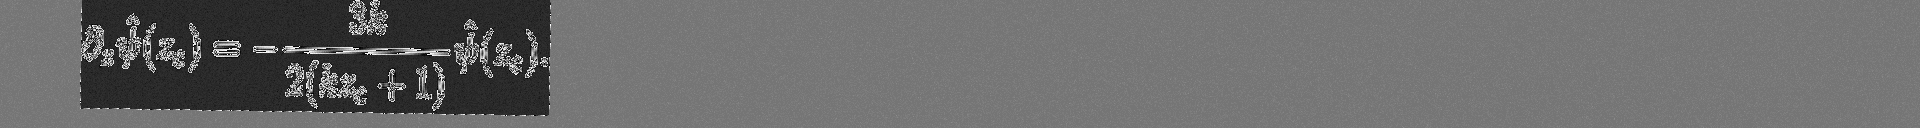

<S>\partial_{z}\hat{\psi}(z_{c})=-{\frac{3k}{2(kz_{c}+1)}}\hat{\psi}(z_{c}).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


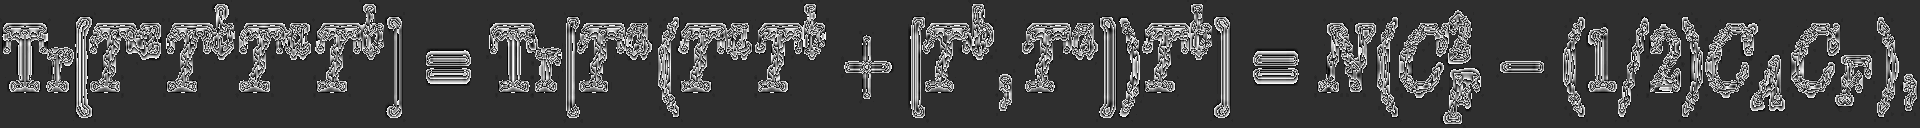

<S>\mathrm{Tr}[T^{a}T^{b}T^{a}T^{b}]=\mathrm{Tr}[T^{a}(T^{a}T^{b}+[T^{b},T^{a}])T^{b}]=N(C_{F}^{2}-(1/2)C_{A}C_{F}),<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


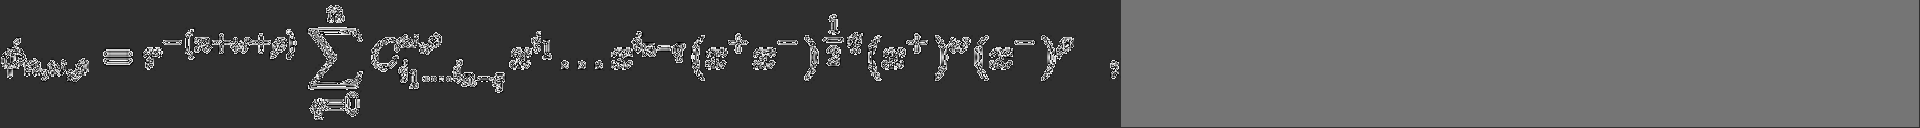

<S>\phi_{n,\omega,\rho}=r^{-(n+\omega+\rho)}\sum_{q=0}^{n}C_{i_{1}....i_{n-q}}^{\omega,\rho}x^{i_{1}}...x^{i_{n-q}}(x^{+}x^{-})^{\frac12q}(x^{+})^{\omega}(x^{-})^{\rho}~~~,<E><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


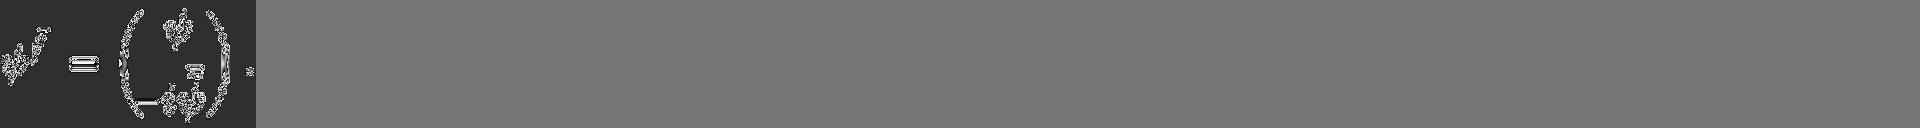

<S>\psi^{\bar{f}}=\left(\begin{array}{c}{\psi\!}\\{\!\!\!-i\bar{\tilde{\psi}}\!}\\\end{array}\right).<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


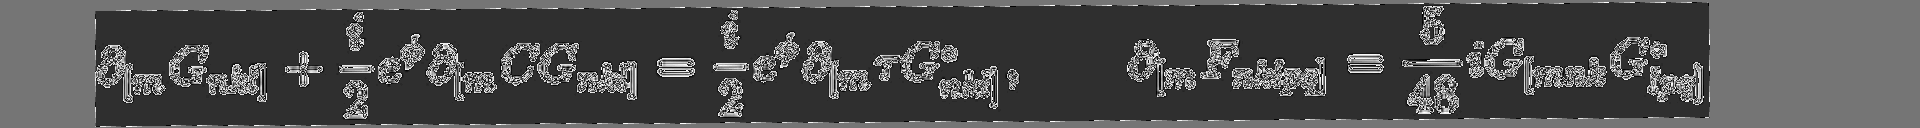

<S>\partial_{[m}G_{nkl]}+\frac{i}{2}e^{\phi}\partial_{[m}CG_{nkl]}=\frac{i}{2}e^{\phi}\partial_{[m}\tauG_{nkl]}^{\ast},\qquad\partial_{[m}F_{nklpq]}=\frac{5}{48}iG_{[mnk}G_{lpq]}^{\ast}<E><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


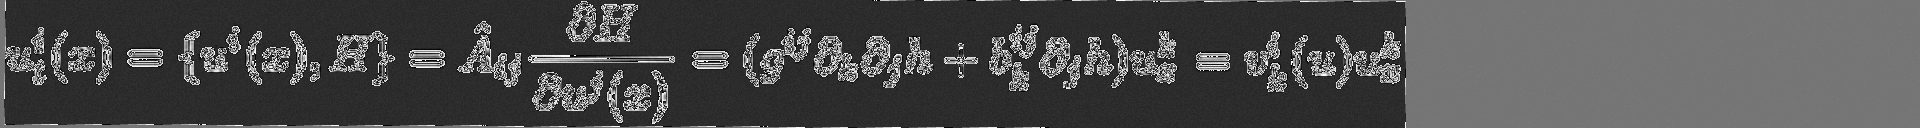

<S>u_{t}^{i}(x)=\{u^{i}(x),H\}=\hat{A}_{ij}\frac{\partialH}{\partialu^{j}(x)}=(g^{ij}\partial_{k}\partial_{j}h+b_{k}^{ij}\partial_{j}h)u_{x}^{k}=v_{k}^{i}(u)u_{x}^{k}<E><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


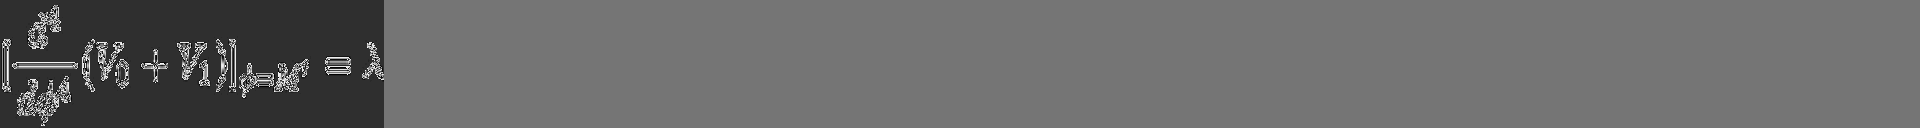

<S>[\frac{d^{4}}{d\phi^{4}}(V_{0}+V_{1})]_{\phi=M^{\prime}}=\lambda<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


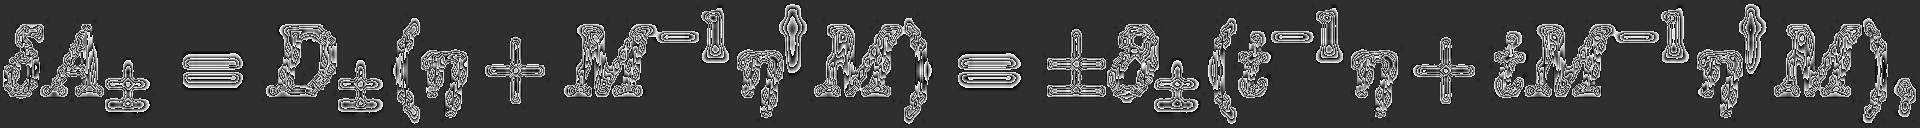

<S>\deltaA_{\pm}=D_{\pm}(\eta+M^{-1}\eta^{\dagger}M)=\pm\partial_{\pm}(t^{-1}\eta+tM^{-1}\eta^{\dagger}M),<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


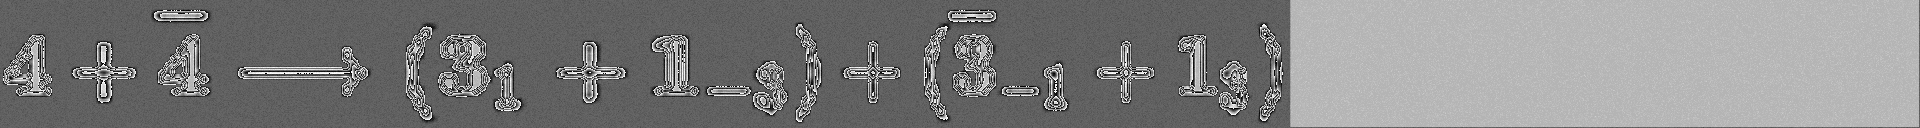

<S>{\bf4}+\overline{{\bf4}}\longrightarrow({\bf3}_{1}+{\bf1}_{-3})+(\overline{{\bf3}}_{-1}+{\bf1}_{3})<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


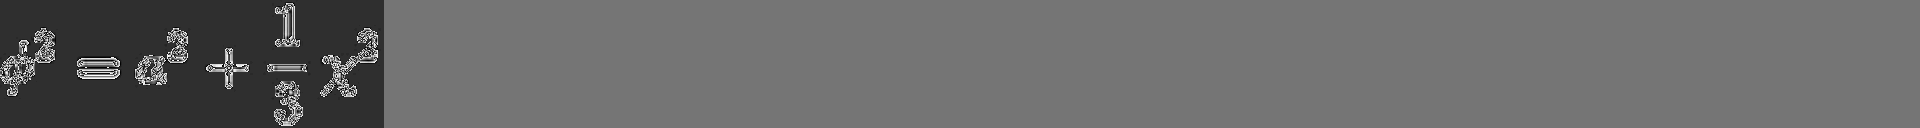

<S>\phi^{2}=a^{2}+\frac{1}{3}\,\chi^{2}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


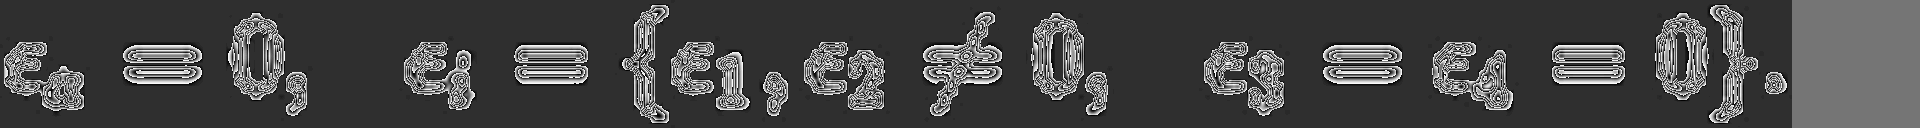

<S>\epsilon_{a}=0,~~~\epsilon_{i}=\{\epsilon_{1},\epsilon_{2}\not=0,~~~\epsilon_{3}=\epsilon_{4}=0\}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


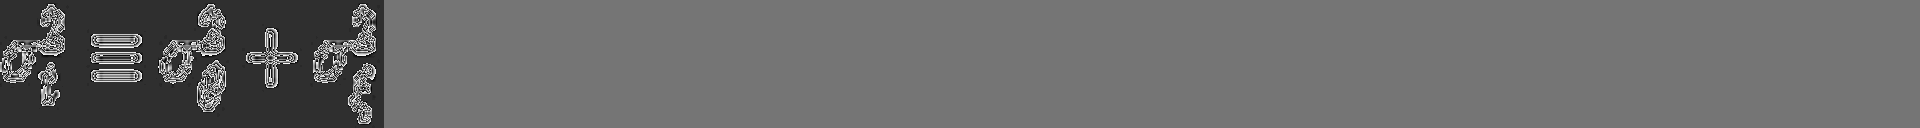

<S>{\sigma_{t}^{2}}\equiv\sigma_{\theta}^{2}+{\sigma}_{\xi}^{2}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


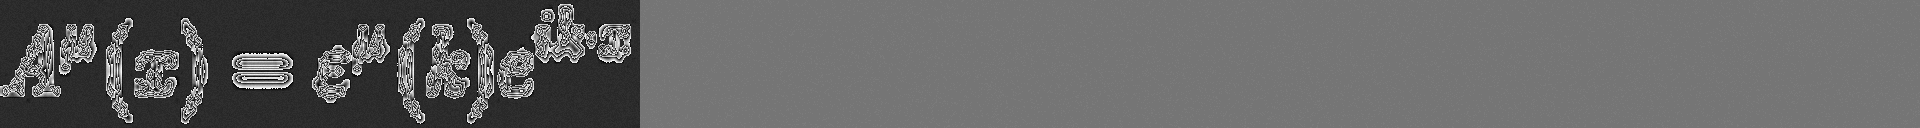

<S>A^{\mu}(x)=\varepsilon^{\mu}(k)e^{ik\cdotx}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


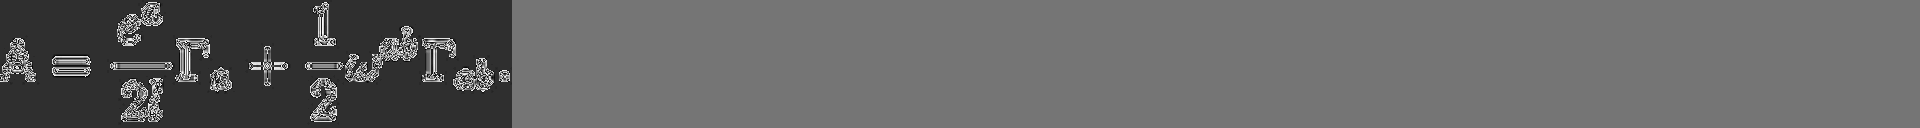

<S>{\sfA}=\frac{e^{a}}{2l}\Gamma_{a}+\frac{1}{2}\omega^{ab}\Gamma_{ab}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


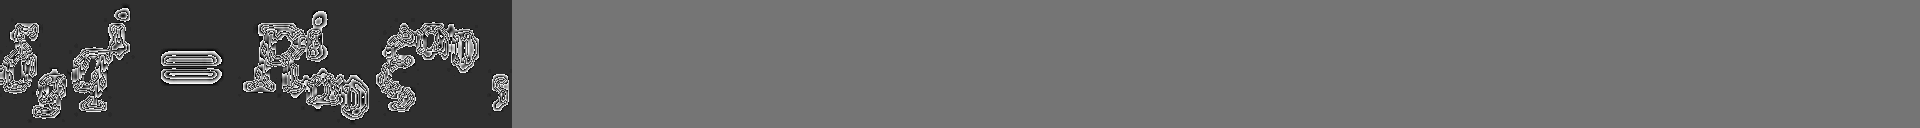

<S>\delta_{g}q^{i}=R_{\alpha_{0}}^{i}\xi^{\alpha_{0}},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


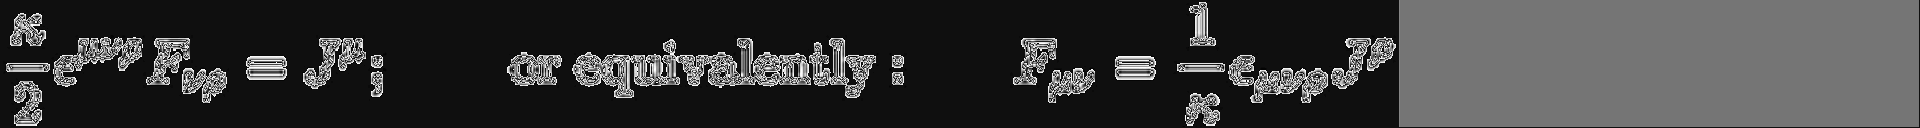

<S>\frac{\kappa}{2}\epsilon^{\mu\nu\rho}F_{\nu\rho}=J^{\mu};\qquad\mathrm{or~equivalently:}\qquadF_{\mu\nu}=\frac{1}{\kappa}\epsilon_{\mu\nu\rho}J^{\rho}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


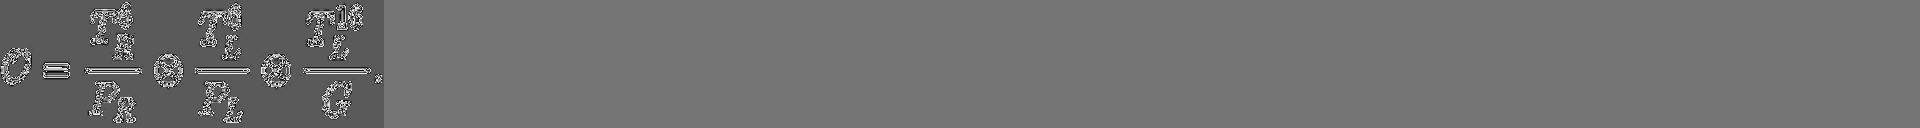

<S>{\calO}=\frac{T_{R}^{6}}{P_{R}}\otimes\frac{T_{L}^{6}}{P_{L}}\otimes\frac{T_{L}^{16}}{G}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


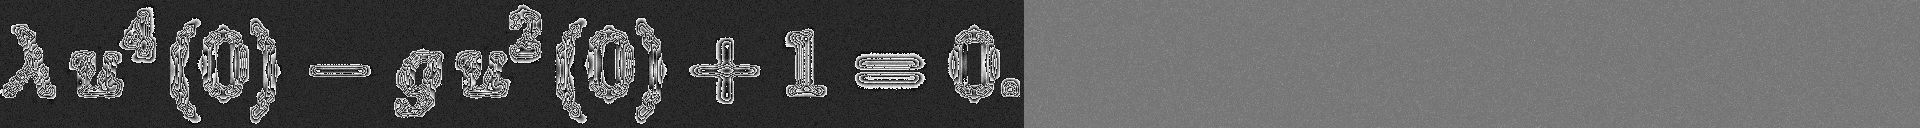

<S>\lambda\,u^{4}(0)-g\,u^{2}(0)+1=0.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


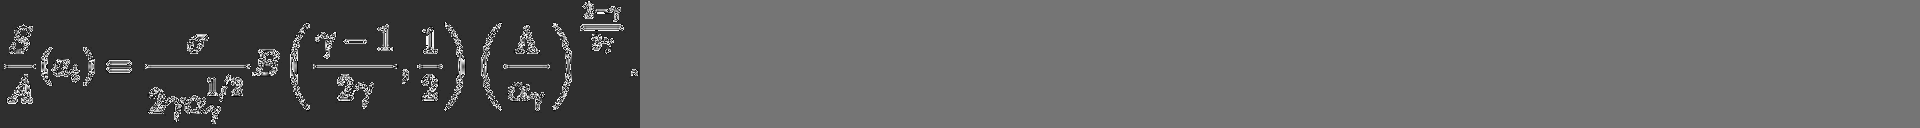

<S>\frac{S}{A}(a_{t})=\frac{\sigma}{2\gamma\alpha_{\gamma}^{1/2}}B\left(\frac{\gamma-1}{2\gamma},\frac{1}{2}\right)\left(\frac{\Lambda}{\alpha_{\gamma}}\right)^{\frac{2-\gamma}{2\gamma}}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


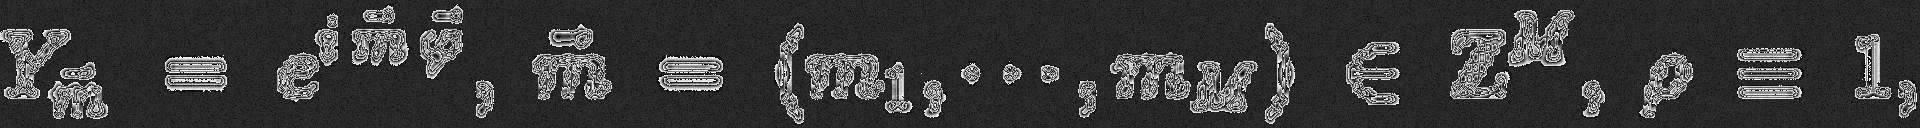

<S>Y_{\vec{m}}\;=\;e^{i\,\vec{m}\,\vec{\varphi}},\;\vec{m}\;=\;(m_{1},\cdots,m_{M})\;\in\;\mathbb{Z}^{M},\;\rho\;\equiv\;1,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


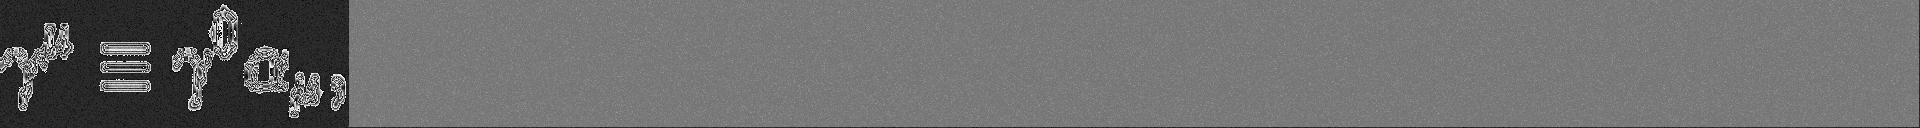

<S>\gamma^{\mu}\equiv\gamma^{0}\alpha_{\mu},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


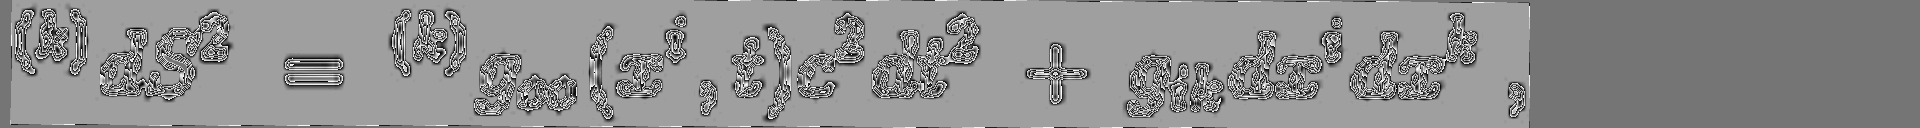

<S>^{(k)}dS^{2}\:=\:{^{(k)}}g_{oo}(x^{i},t)c^{2}dt^{2}\:+\:g_{ik}dx^{i}dx^{k}\:,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


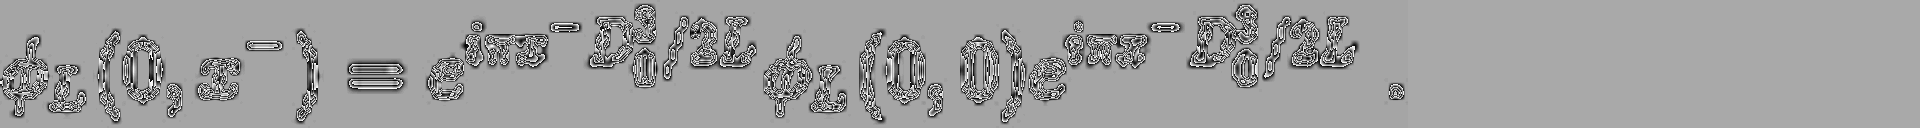

<S>\phi_{L}(0,x^{-})=e^{i\pix^{-}D_{0}^{3}/2L}\phi_{L}(0,0)e^{i\pix^{-}D_{0}^{3}/2L}\;.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


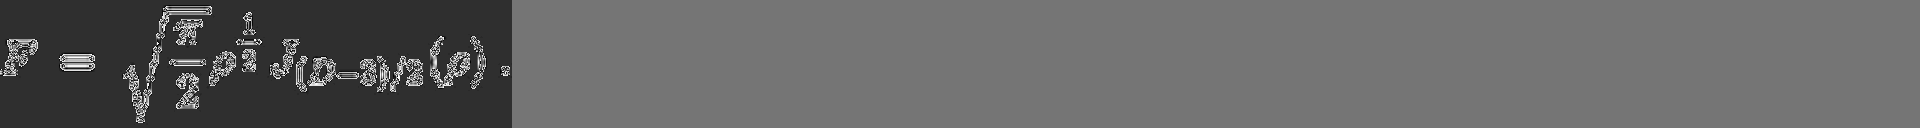

<S>F~=~\sqrt{{\frac{\pi}{2}}}\rho^{{\frac{1}{2}}}J_{(D-3)/2}(\rho)~.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


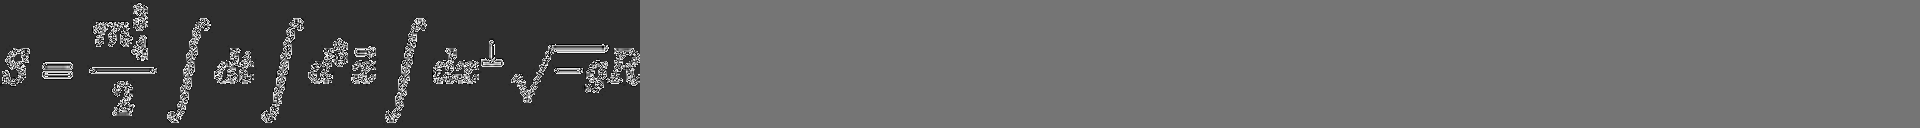

<S>S=\frac{m_{4}^{3}}{2}\intdt\intd^{3}\vec{x}\intdx^{\perp}\sqrt{-g}R<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


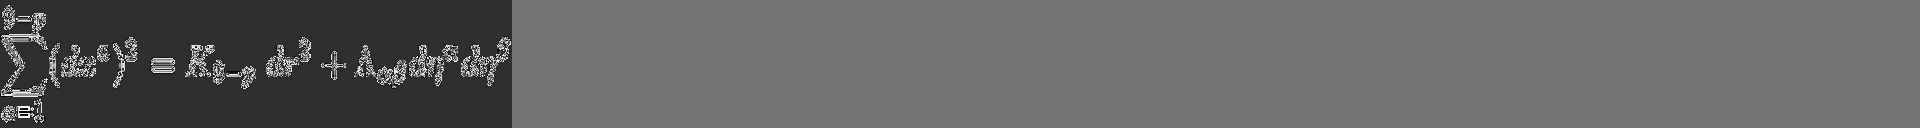

<S>\sum_{a=1}^{9-p}(dx^{a})^{2}=K_{9-p}\dr^{2}+\Lambda_{\alpha\beta}d\eta^{\alpha}d\eta^{\beta}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


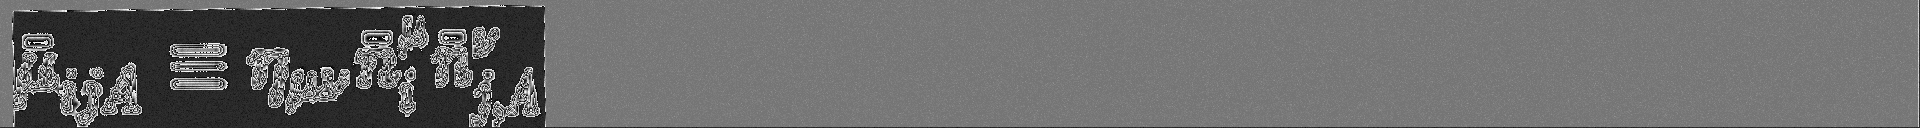

<S>\bar{\mu}_{ijA}\equiv\eta_{\mu\nu}\bar{n}_{i}^{\mu}\bar{n}_{j,A}^{\nu}<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


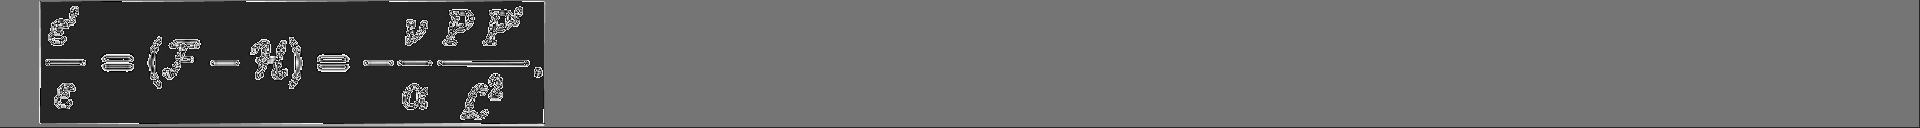

<S>\frac{\varepsilon^{\prime}}{\varepsilon}=({\calF}-{\calH})=-\frac{\nu}{\alpha}\frac{P~P^{\prime}}{{\calL}^{2}}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


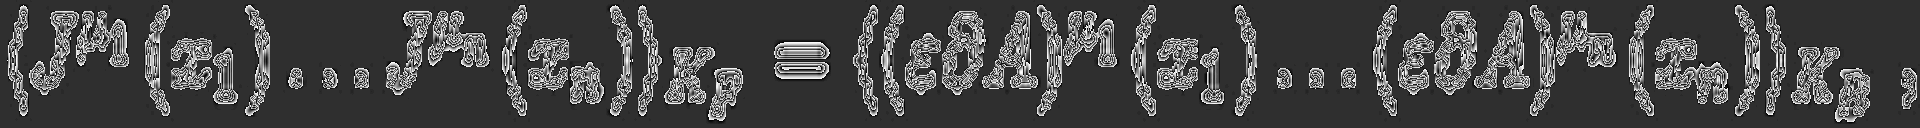

<S>\langleJ^{\mu_{1}}(x_{1})\ldotsJ^{\mu_{n}}(x_{n})\rangle_{K_{F}}=\langle(\varepsilon\partialA)^{\mu_{1}}(x_{1})\ldots(\varepsilon\partialA)^{\mu_{n}}(x_{n})\rangle_{K_{B}}~,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


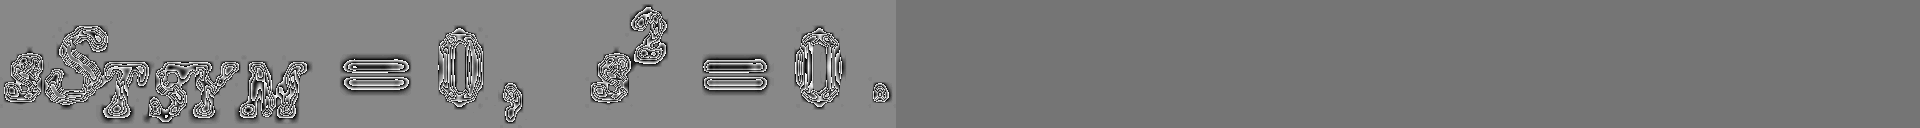

<S>s{\calS}_{TSYM}=0\,,\;\;s^{2}=0\;.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


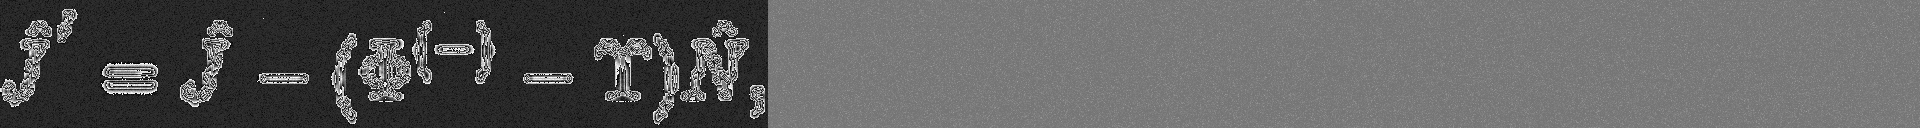

<S>\hat{J}^{\prime}=\hat{J}-(\Phi^{(-)}-\Upsilon)\hat{N},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


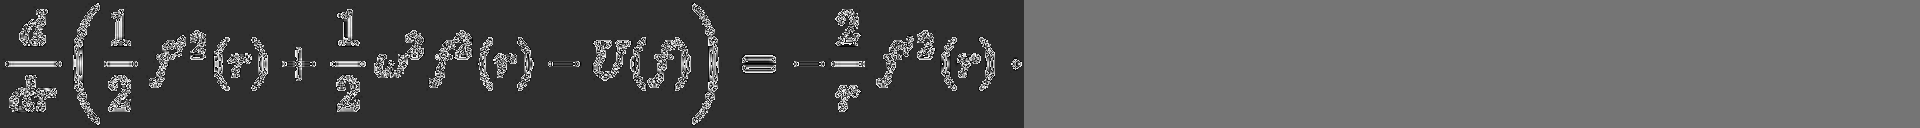

<S>\frac{d}{dr}\left(\frac{1}{2}\,f^{\prime}{}^{2}(r)+\frac{1}{2}\,\omega^{2}f^{2}(r)-U(f)\right)=-\frac{2}{r}\,f^{\prime}{}^{2}(r)\\cdot<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


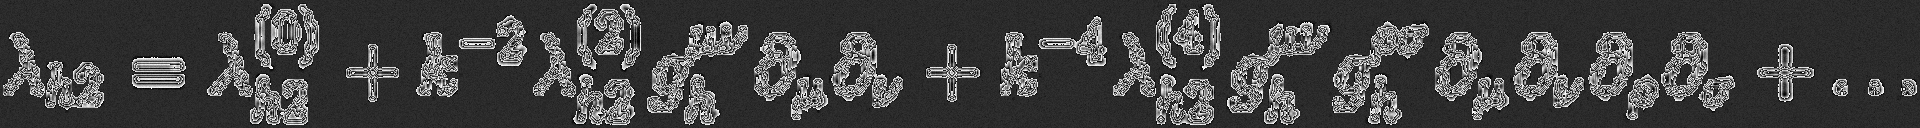

<S>\lambda_{h2}=\lambda_{h2}^{(0)}+k^{-2}\lambda_{h2}^{(2)}g_{h}^{\mu\nu}\partial_{\mu}\partial_{\nu}+k^{-4}\lambda_{h2}^{(4)}g_{h}^{\mu\nu}g_{h}^{\rho\sigma}\partial_{\mu}\partial_{\nu}\partial_{\rho}\partial_{\sigma}+\ldots<E><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


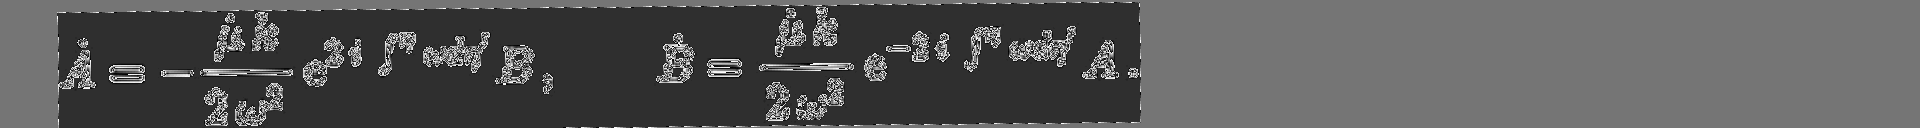

<S>\dot{A}=-\frac{{\dot{\mu}}\,k}{2\,\omega^{2}}\,\mathrm{e}^{2\,i\,\int^{\eta}\omegad\eta^{\prime}}B\,,\qquad\dot{B}=\frac{{\dot{\mu}}\,k}{2\,\omega^{2}}\,\mathrm{e}^{-2\,i\,\int^{\eta}\omegad\eta^{\prime}}A\,.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


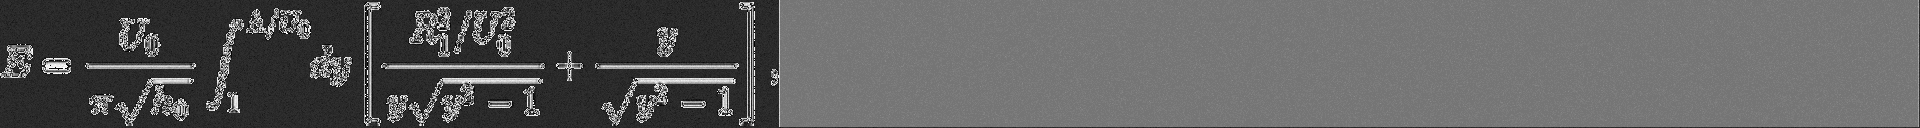

<S>E=\frac{U_{0}}{\pi\sqrt{h_{0}}}\int_{1}^{\Lambda/U_{0}}\!\!dy\left[\frac{R_{1}^{2}/U_{0}^{2}}{y\sqrt{y^{2}-1}}+\frac{y}{\sqrt{y^{2}-1}}\right],<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


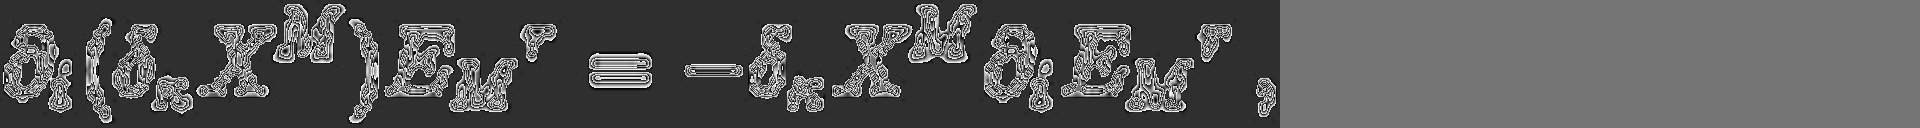

<S>\partial_{i}(\delta_{\kappa}X^{M})E_{M}{}^{r}=-\delta_{\kappa}X^{M}\partial_{i}E_{M}{}^{r}\,,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


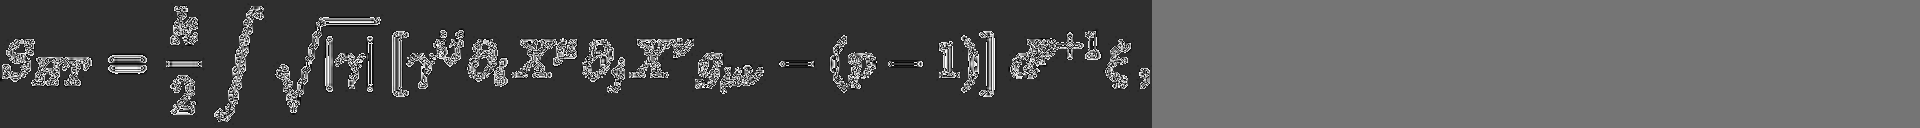

<S>S_{HT}=\frac{k}{2}\int\sqrt{|\gamma|}\left[\gamma^{ij}\partial_{i}X^{\mu}\partial_{j}X^{\nu}g_{\mu\nu}-(p-1)\right]d^{p+1}{\xi}\,,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


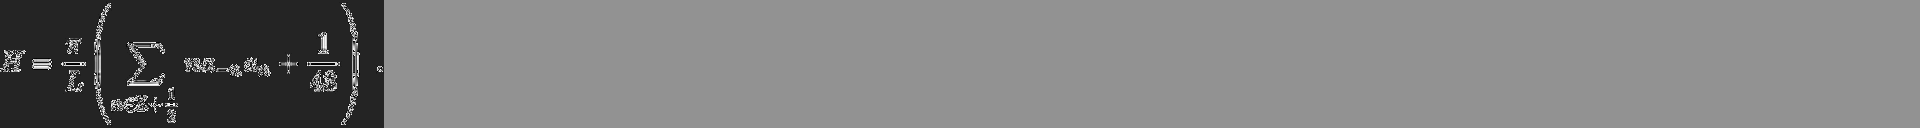

<S>H=\frac{\pi}{L}\left(\sum_{n\in{\mathbbZ}+\frac{1}{2}}na_{-n}a_{n}+\frac{1}{48}\right)\.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


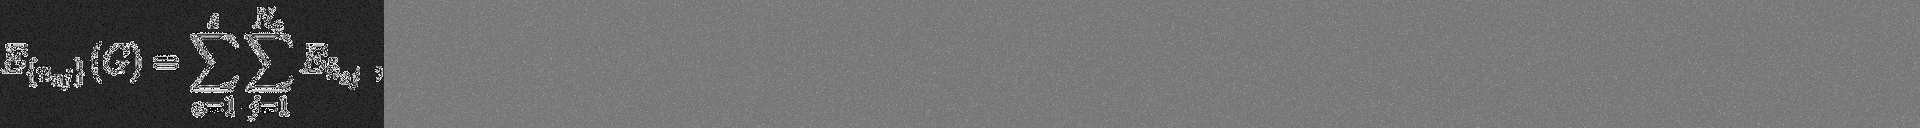

<S>E_{\{n_{aj}\}}(G)=\sum_{a=1}^{s}\sum_{j=1}^{N_{a}}E_{\tilde{n}_{aj}}\;,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


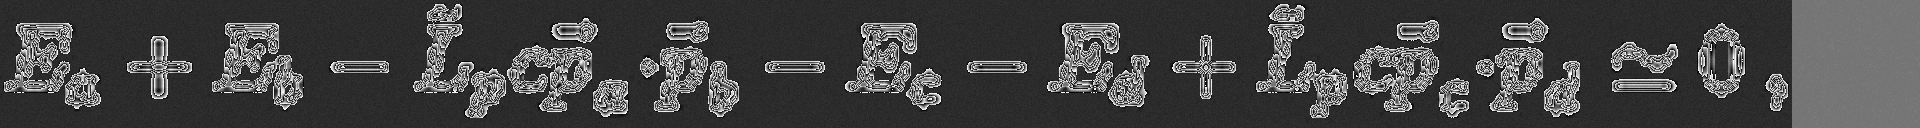

<S>E_{a}+E_{b}-{\tilde{L}}_{p}c\vec{p}_{a}{\cdot}\vec{p}_{b}-E_{c}-E_{d}+{\tilde{L}}_{p}c\vec{p}_{c}{\cdot}\vec{p}_{d}\simeq0~,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


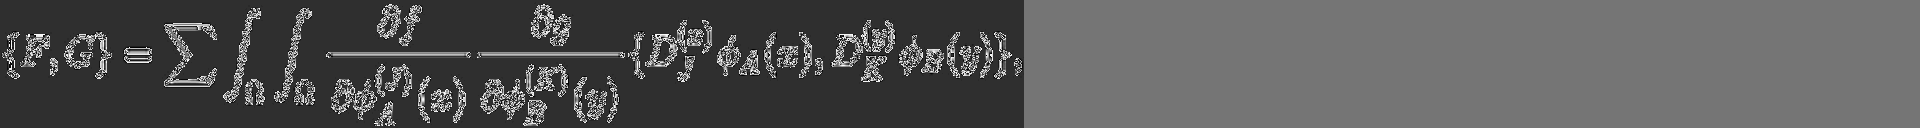

<S>\{F,G\}=\sum\int_{\Omega}\int_{\Omega}{\frac{\partialf}{\partial\phi_{A}^{(J)}(x)}}{\frac{\partialg}{\partial\phi_{B}^{(K)}(y)}}\{D_{J}^{(x)}\phi_{A}(x),D_{K}^{(y)}\phi_{B}(y)\},<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 

torch.Size([1, 128, 1920])

Original image and formula:


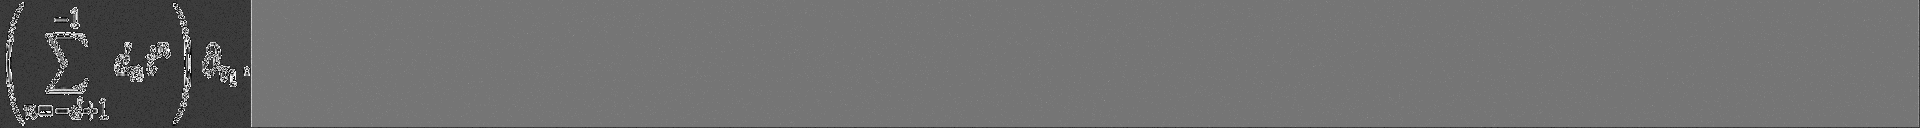

<S>\left(\sum_{n=-d+1}^{-1}d_{n}t^{n}\right)\partial_{v_{1}}.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>

Predicted formula: 



In [23]:
for i in range(70):
    # Get image and label from train data -- change number for different ones
    image_tensor, label = data.data_train[i]
    print(image_tensor.shape)
    transform = transforms.ToPILImage()
    image = transform(image_tensor)
    

    print('\nOriginal image and formula:')
    display(image)
    print(token_to_strings(label))
    print('\nPredicted formula: \n')

In [24]:
data.df.loc[0]

formula            R _ { 1 2 } K _ { 1 } R _ { 2 1 } d K _ { 2 } ...
image_name                                       80f1db54ec657ab.png
height                                                            20
width                                                            200
formula_length                                                   105
latex_tokenized    [R, _, {, 1, 2, }, K, _, {, 1, }, R, _, {, 2, ...
tokenized_len                                                     53
Name: 0, dtype: object

Image is below


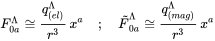

Label:


<IPython.core.display.Math object>

Tex formula: 

F _ { 0 a } ^ { \Lambda } \cong \frac { q _ { ( e l ) } ^ { \Lambda } } { r ^ { 3 } } \, x ^ { a } \quad ; \quad { \tilde { F } } _ { 0 a } ^ { \Lambda } \cong \frac { q _ { ( m a g ) } ^ { \Lambda } } { r ^ { 3 } } \, x ^ { a }


In [25]:
#How to access generated png images 
IMAGE_NAME = data.df['image_name'][10]
image_path= "Data/Data_Bank/generated_png_images/" + IMAGE_NAME
image = Image.open(image_path)#.convert("L")
print('Image is below')
display(image)

# Related Label

image_label_list = data.df[data.df['image_name'] ==  IMAGE_NAME]['formula'].tolist()#.item()
image_label = " ".join(image_label_list)
print('Label:')
display(Math(image_label))
print('Tex formula: \n')
print(data.df[data.df['image_name'] == IMAGE_NAME]['formula'].item())

In [26]:
import tqdm
import cv2
import heapq

# Initialize parameters
min_h = 1e10
min_w = 1e10
max_h = -1
max_w = -1
min_ratio = 1e10
max_ratio = 0
# Traverse the dataset to collect size info
for i in tqdm.tqdm(range(len(data.df['image_name']))):
    try:
        image_name = data.df['image_name'][i]
    except:
        continue
    image_path= "Data/Data_Bank/generated_png_images/" + image_name
    img = cv2.imread(image_path)  # Read image
    h,w, c = img.shape
     # Extract size
    ratio = w / h  # Calculate ratio
    min_h = min_h if min_h <= h else h  # Minimum height
    max_h = max_h if max_h >= h else h  # Maximum height
    min_w = min_w if min_w <= w else w  # Minimum height
    max_w = max_w if max_w >= w else w  # Maximum height
    min_ratio = min_ratio if min_ratio <= ratio else ratio  # Minimum ratio
    max_ratio = max_ratio if max_ratio >= ratio else ratio  # Maximum ratio
# Print info
print('min_h:', min_h)
print('max_h:', max_h)
print('min_w:', min_w)
print('max_w:', max_w)
print('min_ratio:', min_ratio)
print('max_ratio:', max_ratio)

100%|████████████████████████████████████████████████████████████████| 223259/223259 [00:29<00:00, 7462.03it/s]

min_h: 9
max_h: 177
min_w: 24
max_w: 700
min_ratio: 0.42857142857142855
max_ratio: 46.833333333333336


In [27]:
 data.df['image_name'][(data.df['width']>600)& (data.df['width']<700)]

2468      af18fb7693cdc2c.png
11477     c9828a27d99809b.png
25472     448eed8940ae43d.png
44156     54a20e0616edd5d.png
62931     ce4774060920486.png
64968     aa8ed2f98e8a694.png
69719     faa8b6058fc8990.png
72368     c18b48f9b37ce06.png
73068     99a7dc0ca8f2b41.png
81127     d191b8e94d70c17.png
82126     445010c7f583664.png
84696     31ee82c963195b9.png
102576    e52805e50f7d3cf.png
106538    d1a6a8868148b2b.png
139239    be19073b13a90f9.png
141796    6ae9cb93878b02a.png
149577    73199ad83fbe8b7.png
150131    d191b8e94d70c17.png
152509    fdeac549fae19a8.png
160182    3e617b4e872364e.png
160841    ac758a6a0d52796.png
167232    0f0790200865960.png
168011    dd51ba897fe6213.png
171101    5ec0ccef2339069.png
176589    5cb68bcb61c682d.png
192570    6ffc67982ea5fc5.png
194604    3f192df9ce69253.png
199242    13490df4cab1eaf.png
203296    849099efd74e84f.png
214713    17403c5d9662248.png
Name: image_name, dtype: object

In [28]:
IMAGE_NAME = data.df['image_name'][199242]
image_path= "Data/Data_Bank/generated_png_images/" + IMAGE_NAME
image = Image.open(image_path)#.convert("L")
print('Image is below')
display(image)

# Related Label

image_label_list = data.df[data.df['image_name'] ==  IMAGE_NAME]['formula'].tolist()#.item()
image_label = " ".join(image_label_list)
print('Label:')
display(Math(image_label))
print('Tex formula: \n')
print(data.df[data.df['image_name'] == IMAGE_NAME]['formula'].item())

Image is below


Label:


<IPython.core.display.Math object>

Tex formula: 

\Gamma ^ { a } ( w ^ { b } ) = w ^ { a } \wedge w ^ { b } - \delta ^ { a b } , \quad \Gamma ^ { a } ( w ^ { b } \wedge V ) = \Gamma ^ { a } ( w ^ { b } ) \wedge V - w ^ { b } \wedge \Gamma ^ { a } ( V ) , \qquad \mathrm { ~ V ~ i s ~ a n ~ a r b i t r a r y ~ p ~ - f o r m . }
